# Exploratory Data Analysis on the Titanic Dataset

In [1]:
import seaborn as sns
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
sns.set(color_codes=True)

## Download the Dataset

In [3]:
!kaggle competitions download -c titanic -p data

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


# Explore the dataset

In [77]:
df_data = pd.read_csv('data/train.csv')
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_data.shape

(891, 12)

Instantly we can see that there are some missing values on the Cabin column and the line bellow confirms that there are missing values

In [7]:
df_data.isnull().values.any()

True

Let's see how many null values are and in which columns

In [8]:
total_rows =  df_data.shape[0]
columns = df_data.columns
na_values = {}

for column in columns:
    na_values[column] = f"{(1 - df_data[column].count() / total_rows)*100:.2f}%"
    
na_values

{'PassengerId': '0.00%',
 'Survived': '0.00%',
 'Pclass': '0.00%',
 'Name': '0.00%',
 'Sex': '0.00%',
 'Age': '19.87%',
 'SibSp': '0.00%',
 'Parch': '0.00%',
 'Ticket': '0.00%',
 'Fare': '0.00%',
 'Cabin': '77.10%',
 'Embarked': '0.22%'}

We can see that Age, Cabin and Embarked have None values with Cabin having 77% of its values as None

## First glance - Columns

There is a detailed explanation of the columns in Kaggle. The column `Survived` is our label. The rest of the columns are as follows:

The rest of the columns:
- PassengerId: This is the identifier of the passenger
- Pclass: This is the socio-economic status, we can see that the variable is ordinal
    - 1: Upper
    - 2: Middle
    - 3: Lower
- Name
- Sex: This is a categorical variable, we will have to assign numbers to each category
    - 0: male
    - 1: female
- Age: This is also an interval-level variable
- SibSp: family relations, we will have to explore that variable
- Parch: family relations, we will also have to epxlore that variable
- Ticket: The ticket that passenger had
- Fare: Passenger fare
- Cabin: we can already see some NaN values here
- Embarked: Port
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton
    
Let's analyze each feature!

## Survived

Text(0.5, 0, 'Survivability')

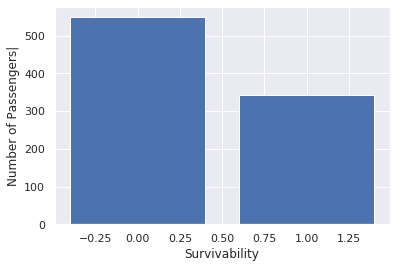

In [9]:
survived = df_data['Survived'].values.tolist()
val, cnt = np.unique(survived, return_counts=True)
plt.bar(val, cnt)
plt.ylabel("Number of Passengers|")
plt.xlabel("Survivability")

The probability of someone dying in the Titanic is higher than the probability of surviving. This is just an observation we did in our data by just plotting the survival rate. We extracted that hypothesis by just looking at one feature.  Let's see what we can learn from the other features!

Text(0.5, 0, 'Survivability')

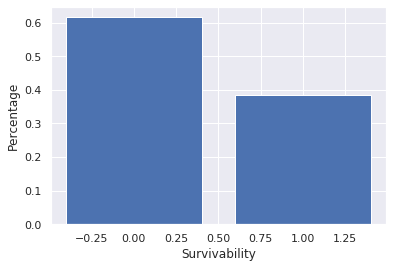

In [10]:
survived = df_data['Survived'].values.tolist()
val, cnt = np.unique(survived, return_counts=True)
prop = cnt / len(survived)
plt.bar(val, prop)
plt.ylabel("Percentage")
plt.xlabel("Survivability")

## Pclass
P-class is the class of the passenger. We have three classes in the Titanic dataset:

- Upper class
- Middle class
- Lower class

The class is based on the income of the passenger, it is a proxy for socioeconomic status. Let's see what we can learn from that.

Text(0.5, 0, 'Pclass')

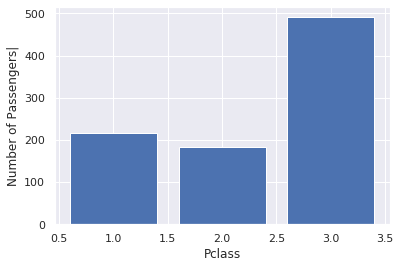

In [11]:
survived = df_data['Pclass'].values.tolist()
val, cnt = np.unique(survived, return_counts=True)
plt.bar(val, cnt)
plt.ylabel("Number of Passengers|")
plt.xlabel("Pclass")

Text(0.5, 0, 'Economic Class')

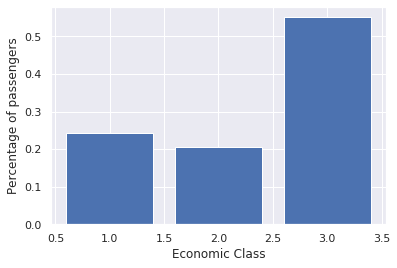

In [12]:
passenger_classes = df_data['Pclass'].values.tolist()
val, cnt = np.unique(passenger_classes, return_counts=True)
prop = cnt / len(passenger_classes)
plt.bar(val, prop)
plt.ylabel("Percentage of passengers")
plt.xlabel("Economic Class")

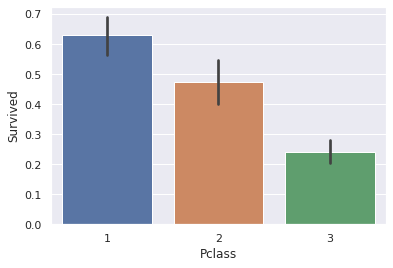

In [56]:
sns.barplot(x='Pclass', y='Survived', data=df_data)

We can see that Titanic had a lot more passengers from the lower class, we can also see that more than 50% of the passengers are in the lowest economic class. Almost 70% of the non-survivors were at the lowest economic class.

## Gender
We all know from the famous movie "Titanic" that in the case of emergency women and children are prioritized to the lifeboats. Let's see if we can back it up with data.

Text(0.5, 0, 'Sex')

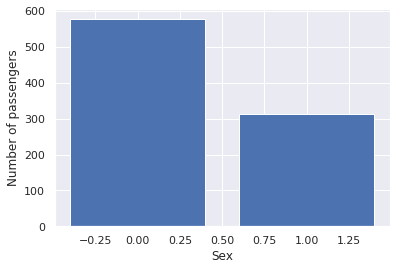

In [57]:
sex = df_data['Sex'].values.tolist()
val, cnt = np.unique(sex, return_counts=True)
plt.bar(val, cnt)
plt.ylabel("Number of passengers")
plt.xlabel("Sex")

Text(0.5, 0, 'Sex')

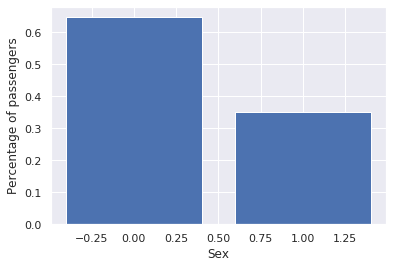

In [58]:
sex = df_data['Sex'].values.tolist()
val, cnt = np.unique(sex, return_counts=True)
prop = cnt / len(sex)
plt.bar(val, prop)
plt.ylabel("Percentage of passengers")
plt.xlabel("Sex")

We can see that more than 80% of the non-suvivors where men!

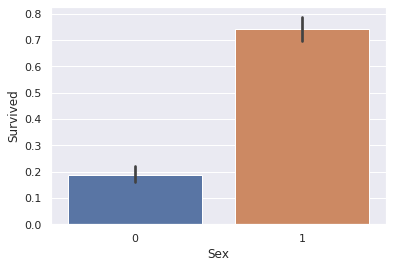

In [59]:
sns.barplot(x='Sex', y='Survived', data=df_data)

Almost 70% of the survivors were women

The numbers support the hypothesis we did, based on the movie! Let's look now at the age. There are some missing data in that column, we are going to use only the ones we have. When we build the model, we'll fill that data based on the observations (future post).

## Age

Age is an interval-level variable. Interval-level data are quantitative, i.e. years, temperature, etc. In this dataset, Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5. We will transform age into integers with .x going to 0.

Text(0.5, 0, 'Age')

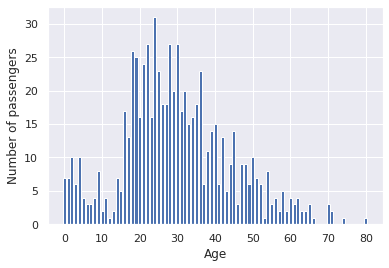

In [78]:
age = df_data['Age'].dropna().astype(int).values.tolist()
val, cnt = np.unique(age, return_counts=True)
prop = cnt / len(age)
plt.bar(val, cnt)
plt.ylabel("Number of passengers")
plt.xlabel("Age")

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Age')]

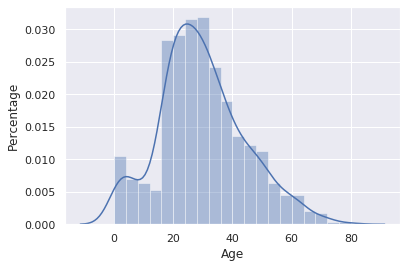

In [79]:
age = df_data['Age'].dropna().astype(int).values.tolist()
ax = sns.distplot(age)
ax.set(xlabel='Age', ylabel='Percentage')

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Age')]

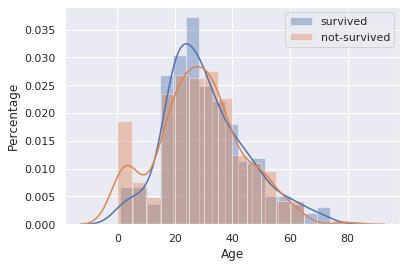

In [80]:
age_survived = df_data[df_data['Survived'] == 0]['Age'].dropna().astype(int).values.tolist()
age_not_survived = df_data[df_data['Survived'] == 1]['Age'].dropna().astype(int).values.tolist()
ax = sns.distplot(age_survived, label='survived')
ax = sns.distplot(age_not_survived, label='not-survived')
plt.legend()
ax.set(xlabel='Age', ylabel='Percentage')

Again, the hypothesis is valid, children and infants have a high survival rate. We also see that passengers in their 20s-40s also had a high survival rate, care to bet on their gender? Let's see!

[Text(0, 0.5, 'Percentage - survived'), Text(0.5, 0, 'Age')]

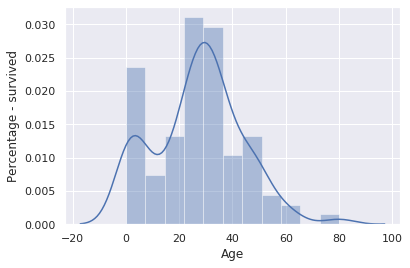

In [24]:
age = df_data[(df_data['Survived'] == 1) & (df_data['Sex'] == 'male')]['Age'].dropna().astype(int).values.tolist()
ax = sns.distplot(age)
ax.set(xlabel='Age', ylabel='Percentage - survived')

Well, that makes sense for the female passengers, but we also notice an increase in survival rate on male passengers around their 30s. We know that in the Titanic all women had the highest priority to get into a lifeboat, but it seems that some men potentially with higher P-class managed to get in.

## Siblings/Spouses

We observe that most of the passengers did not had any siblings or spouses in the Titanic

Text(0.5, 0, 'sibsp')

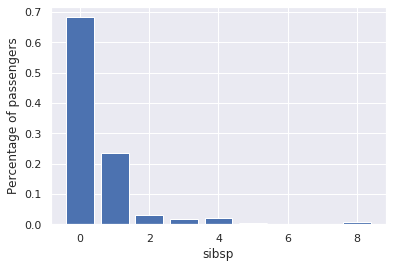

In [25]:
sibsp = df_data['SibSp'].values.tolist()
val, cnt = np.unique(sibsp, return_counts=True)
prop = cnt / len(sibsp)
plt.bar(val, prop)
plt.ylabel("Percentage of passengers")
plt.xlabel("sibsp")

The SibSp seems to follow the same distribution on the non-survived

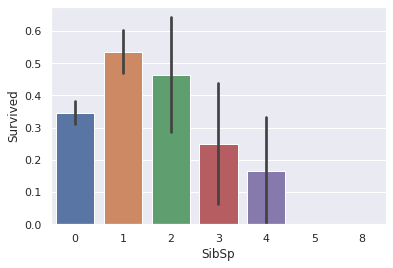

In [70]:
sns.barplot(x='SibSp', y='Survived', data=df_data)

We can see that high passengers with high SibSp have not survived the Titanic. Although, this is a bit harsh, we do not have the complete view of all the passengers of the Titanic, hust one dataset.

## Parent/Child
Same story as with SibSp. In both cases we can see that most of the passengers were having 0 to 1 parent/child

Text(0.5, 0, 'Parch')

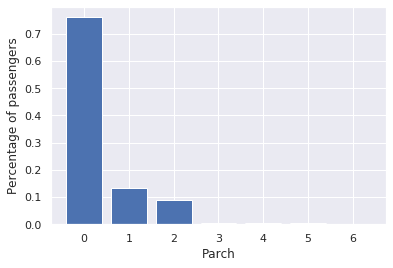

In [71]:
parch = df_data['Parch'].values.tolist()
val, cnt = np.unique(parch, return_counts=True)
prop = cnt / len(parch)
plt.bar(val, prop)
plt.ylabel("Percentage of passengers")
plt.xlabel("Parch")

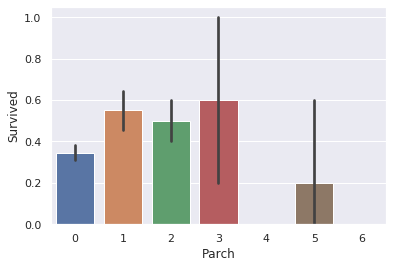

In [73]:
sns.barplot(x='Parch', y='Survived', data=df_data)

Again, passengers with more than 6 parents/children did not survive the Titanic 

## Fare
We observe that the fares were mostly low. The survival rate is appearing on high fare in contrast to low fares.

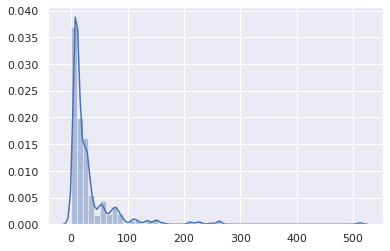

In [74]:
age = df_data['Fare'].dropna().values.tolist()
sns.distplot(age)
plt.show()

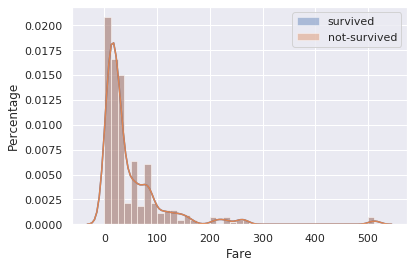

In [75]:
age_survived = df_data[df_data['Survived'] == 1]['Fare'].dropna().values.tolist()
age_not_survived = df_data[df_data['Survived'] == 1]['Fare'].dropna().values.tolist()
ax = sns.distplot(age_survived, label='survived')
ax = sns.distplot(age_not_survived, label='not-survived')
plt.legend()
ax.set(xlabel='Fare', ylabel='Percentage')
plt.show()

# Correlation between columns

We'll have to look for correlations between features. First, we assign the value 0 to males and 1 to females

In [81]:
df_data['Sex'] = df_data['Sex'].map({'female': 1, 'male': 0})
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Now we will search for correlations between the columns. As for age, we will try to see if filling the NaN values is making any difference

In [82]:
df_data['new_age'] = df_data['Age'].fillna(df_data['Age'].mean())
corr_matrix = df_data[['Survived', 'Sex', 'new_age', 'Pclass', 'Fare', 'Parch', 'SibSp']].corr()
corr_matrix

,Survived,Sex,new_age,Pclass,Fare,Parch,SibSp
Survived,1.000000,0.543351,-0.069809,-0.338481,0.257307,0.081629,-0.035322
Sex,0.543351,1.000000,-0.084153,-0.131900,0.182333,0.245489,0.114631
new_age,-0.069809,-0.084153,1.000000,-0.331339,0.091566,-0.179191,-0.232625
Pclass,-0.338481,-0.131900,-0.331339,1.000000,-0.549500,0.018443,0.083081
Fare,0.257307,0.182333,0.091566,-0.549500,1.000000,0.216225,0.159651
Parch,0.081629,0.245489,-0.179191,0.018443,0.216225,1.000000,0.414838
SibSp,-0.035322,0.114631,-0.232625,0.083081,0.159651,0.414838,1.000000


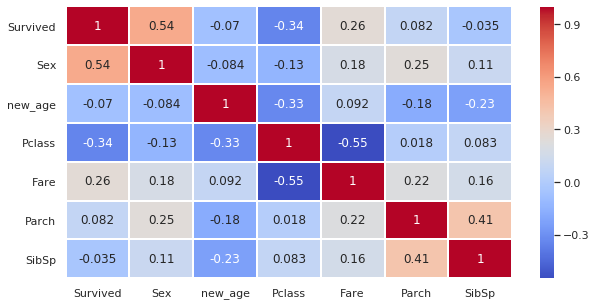

In [83]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, linewidths=1, annot=True, cmap='coolwarm')

In [84]:
corr_matrix = df_data[['Survived', 'Sex', 'Age', 'Pclass', 'Fare', 'Parch', 'SibSp']].corr()
corr_matrix

,Survived,Sex,Age,Pclass,Fare,Parch,SibSp
Survived,1.000000,0.543351,-0.077221,-0.338481,0.257307,0.081629,-0.035322
Sex,0.543351,1.000000,-0.093254,-0.131900,0.182333,0.245489,0.114631
Age,-0.077221,-0.093254,1.000000,-0.369226,0.096067,-0.189119,-0.308247
Pclass,-0.338481,-0.131900,-0.369226,1.000000,-0.549500,0.018443,0.083081
Fare,0.257307,0.182333,0.096067,-0.549500,1.000000,0.216225,0.159651
Parch,0.081629,0.245489,-0.189119,0.018443,0.216225,1.000000,0.414838
SibSp,-0.035322,0.114631,-0.308247,0.083081,0.159651,0.414838,1.000000


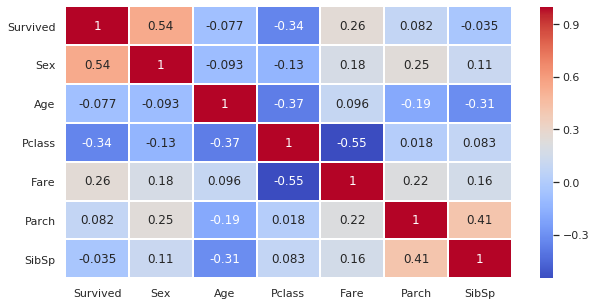

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, linewidths=1, annot=True, cmap='coolwarm')

We can see that Survived has a correlation with Sex, P-class, and Fare and the movie can totally back this up! There is a lot more in that heatmap.

- Fare has a negative correlation with P-class, which means the more the fare increases the more the P-class decreases, which makes sense, P-class 1 is the Upper one.
- Age has a negative correlation with P-class,

# Hypothesis testing
We want to find the percentage of survival if the passenger is young age

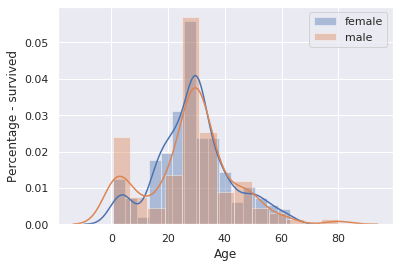

In [92]:
age_female_survived = df_data[
    (df_data['Survived'] == 1) & (df_data['Sex'] == 1)
]['new_age'].values.tolist()
age_male_survived = df_data[
    (df_data['Survived'] == 1) & (df_data['Sex'] == 0)
]['new_age'].values.tolist()
ax = sns.distplot(age_female_survived, label='female')
ax = sns.distplot(age_male_survived, label='male')
ax.set(xlabel='Age', ylabel='Percentage - survived')
plt.legend()

We can see that the females had a higher percentage at a younger age.

Text(0.5, 0, 'Parch')

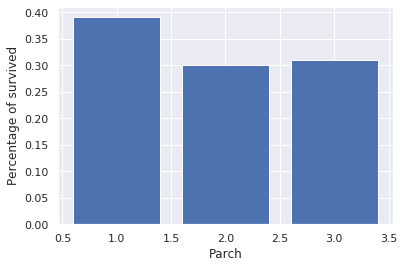

In [94]:
pclass = df_data[
    (df_data['Survived'] == 1) & (df_data['Sex'] == 1)
]['Pclass'].values.tolist()
val, cnt = np.unique(pclass, return_counts=True)
prop = cnt / len(pclass)
plt.bar(val, prop)
plt.ylabel("Percentage of survived")
plt.xlabel("Parch")

The survivability of females are almost irrelevant with the Pclass